### The Impact of Large Sample Sizes

When we increase our sample size, even the smallest of differences may seem significant.  

To illustrate this point, work through this notebook and the quiz questions that follow below.

Start by reading in the libraries and data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to identify the null and alternative hypotheses for these cases. 

$H_0: \mu = 67.60$
$H_1: \mu \neq 67.60$

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws? 
Use **quiz 2** below to assure your answers are correct.  

In [2]:
full_data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [3]:
full_data.height.mean()

67.597486973079342

In [4]:
full_data.height.std()

3.1194332065503421

In [5]:
sample1 = full_data.sample(5)

In [6]:
print(sample1.height.mean(),sample1.height.std())

67.8823425205 2.84349655529


In [8]:
boot_mean = []
for _ in range(10000):
    bootsamp = sample1.sample(5, replace = True)
    mean = bootsamp.height.mean()
    boot_mean.append(mean)

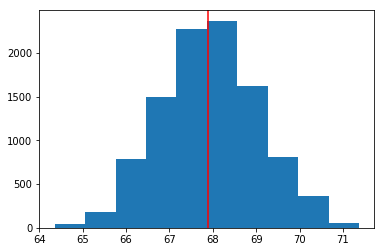

In [18]:
plt.hist(boot_mean)
plt.axvline(x=sample1.height.mean(), color = 'red')

In [11]:
print(np.array(boot_mean).mean(),np.array(boot_mean).std())

67.9029149644 1.141357352


`3.` Using the null and alternative set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

In [13]:
null_val= np.random.normal(67.6, np.array(boot_mean).std(), 10000)  #if H0 true, use 67.6 from hypothesis, std from simulation

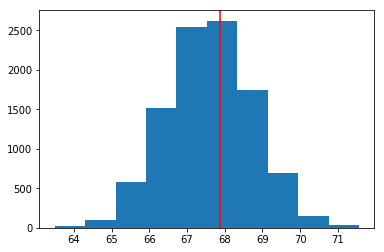

In [20]:
plt.hist(null_val)
plt.axvline(x=sample1.height.mean(), color = 'red')

In [21]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions

# probability of a statistic higher than observed
high = (null_val>sample1.height.mean()).mean()
high

0.40339999999999998

In [26]:
# probability a statistic is more extreme lower
low = (null_val.mean() - (sample1.height.mean() - null_val.mean()) < null_val).mean()
low

0.5968

In [27]:
low+high

1.0002

67.3160423679 67.8823425205


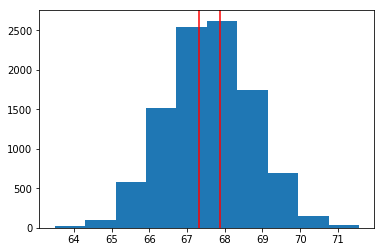

In [38]:
upper_bound = sample1.height.mean()
lower_bound = null_val.mean() - (sample1.height.mean() - null_val.mean()) # as old one

plt.hist(null_val);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist
print(lower_bound,upper_bound)

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

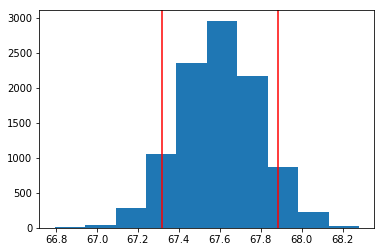

In [36]:
sampling_dist_mean300 = []
sample_of_ = full_data.sample(300)
for _ in range(10000):
    sample_of_300 = sample_of_.sample(300,replace=True)
    sample_mean = sample_of_300.height.mean()
    sampling_dist_mean300.append(sample_mean)
    
std_sampling_dist300 = np.std(sampling_dist_mean300)    # std from simulation
null_vals = np.random.normal(67.6, std_sampling_dist300, 10000)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [39]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
upper_bound = sample1.height.mean()
lower_bound = null_val.mean() - (sample1.height.mean() - null_val.mean())


# probability of a statistic lower than observed
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

0.14729999999999999

`5.` Reflect on what happened by answering the final quiz in this concept.

**Even with a very small difference between a sample mean and a hypothesized population mean, the difference will end up being significant with a very large sample size.**